In [ ]:
import pandas as pd

filepath_dict = {'yelp':   'data/sentiment_analysis/yelp_labelled.txt',
                 'amazon': 'data/sentiment_analysis/amazon_cells_labelled.txt',
                 'imdb':   'data/sentiment_analysis/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentences', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)
    
df = pd.concat(df_list)
display(df.iloc[0:2])

In [2]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentences'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.3, random_state=1000)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

X_train

<700x1665 sparse matrix of type '<class 'numpy.int64'>'
	with 6898 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy", score)

Accuracy 0.8033333333333333


In [5]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentences'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.3, random_state=1000)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    
    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)

    print(f"Accuracy for {source} is {score}")

Accuracy for yelp is 0.8033333333333333
Accuracy for amazon is 0.78
Accuracy for imdb is 0.7733333333333333


In [6]:
from keras.models import Sequential
from keras.layers import Dense

input_dim = X_train.shape[1] # Number of features

model = Sequential()

model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                24410     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 24,421
Trainable params: 24,421
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

history = model.fit(X_train, y_train, epochs=100, verbose=False, validation_data=(X_test, y_test), batch_size=10)

Instructions for updating:
Use tf.cast instead.


In [40]:
# model.fit(X_train, y_train, epochs=20, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Train on 523 samples, validate on 225 samples
Epoch 1/20
523/523 [==============================] - 0s 262us/step - loss: 3.7814e-04 - accuracy: 1.0000 - val_loss: 0.9697 - val_accuracy: 0.7822
Epoch 2/20
523/523 [==============================] - 0s 219us/step - loss: 3.6605e-04 - accuracy: 1.0000 - val_loss: 0.9742 - val_accuracy: 0.7822
Epoch 3/20
523/523 [==============================] - 0s 194us/step - loss: 3.5350e-04 - accuracy: 1.0000 - val_loss: 0.9774 - val_accuracy: 0.7867
Epoch 4/20
523/523 [==============================] - 0s 174us/step - loss: 3.4156e-04 - accuracy: 1.0000 - val_loss: 0.9812 - val_accuracy: 0.7867
Epoch 5/20
523/523 [==============================] - 0s 183us/step - loss: 3.3038e-04 - accuracy: 1.0000 - val_loss: 0.9846 - val_accuracy: 0.7867
Epoch 6/20
523/523 [==============================] - 0s 167us/step - loss: 3.1971e-04 - accuracy: 1.0000 - val_loss: 0.9886 - val_accuracy: 0.7822
Epoch 7/20
523/523 [==============================] - 0s 160us/ste

In [8]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print(f"Training accuracy: {accuracy}")

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing accuracy: {accuracy}")

Training accuracy: 1.0
Testing accuracy: 0.7911111116409302


In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Tarining and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Tarining and validation loss')
    plt.legend()

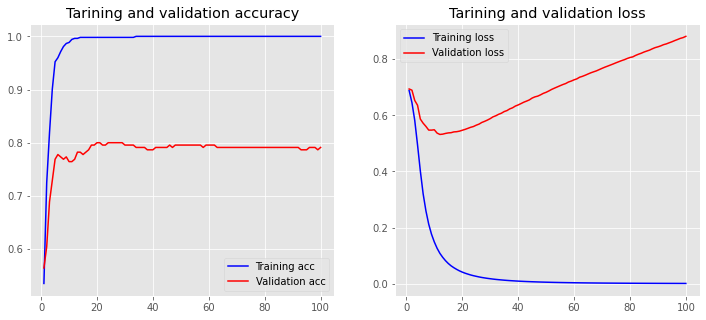

In [10]:
plot_history(history)

In [12]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

print(sentences_train[5])
print(X_train[5])

Your brain will attempt to shut-down as part of a primal impulse of self-preservation.  
[80, 538, 84, 300, 9, 903, 301, 17, 148, 4, 2, 904, 905, 4, 214, 906]


In [13]:
for word in ['the', 'all', 'in', 'sad']:
    print(f"{word}: {tokenizer.word_index[word]}")

the: 1
all: 27
in: 10


KeyError: 'sad'